# Examples for computing the dispersion function and tracing dispersion curves for P-SV leaky modes (guided waves)

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import ctypes
import math
import time
import dispersion as disp
from roots_finding_leaky import *

### Embedded waves (layer sandwiched between half-spaces: imperfect elastic waveguide)

In [14]:
# Model
nlayers=3 # number of layers
vp=np.array([4.5,3.0,5.5])
vs=np.array([2.3,1.7,2.7])
rho=np.array([2.3,2,2.5])
d=np.array([100,0.015,100])

# define the size of the map
fmin=0
fmax=500
nf=500
kim_min=-10 # imaginary horizontal wavenumber (attenuation)
kim_max=10
nk=200
cmin=1.5
cmax=6
nc=500

c0=3.4
k0=2.5

f=np.linspace(fmin,fmax,num=nf,dtype='float64')
kim=np.linspace(kim_min,kim_max,num=nk,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')

# c-f (phase velocity-frequency) dispersion function map D(c,f,kim)
embedded_waves_map1=np.zeros((nk,nf),dtype='complex64') # half-space on top and at the bottom
for i in range(nk):
    for j in range(nf):
        embedded_waves_map1[i][j] = disp.halfspace_solid_halfspace_leaky(frequency=f[j],wavenumber=complex(2*math.pi*f[j]/c0,kim[i]),nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

embedded_waves_map2=np.zeros((nc,nf),dtype='complex64')
for i in range(nc):
    for j in range(nf):
        embedded_waves_map2[i][j] = disp.halfspace_solid_halfspace_leaky(frequency=f[j],wavenumber=complex(2*math.pi*f[j]/c[i],k0),nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)
        
embedded_waves_map3=np.zeros((nc,nf),dtype='complex64')
for i in range(nc):
    for j in range(nf):
        embedded_waves_map3[i][j] = disp.halfspace_solid_halfspace(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

Text(0.5, 1.0, '$sgn(Imag(D))$')

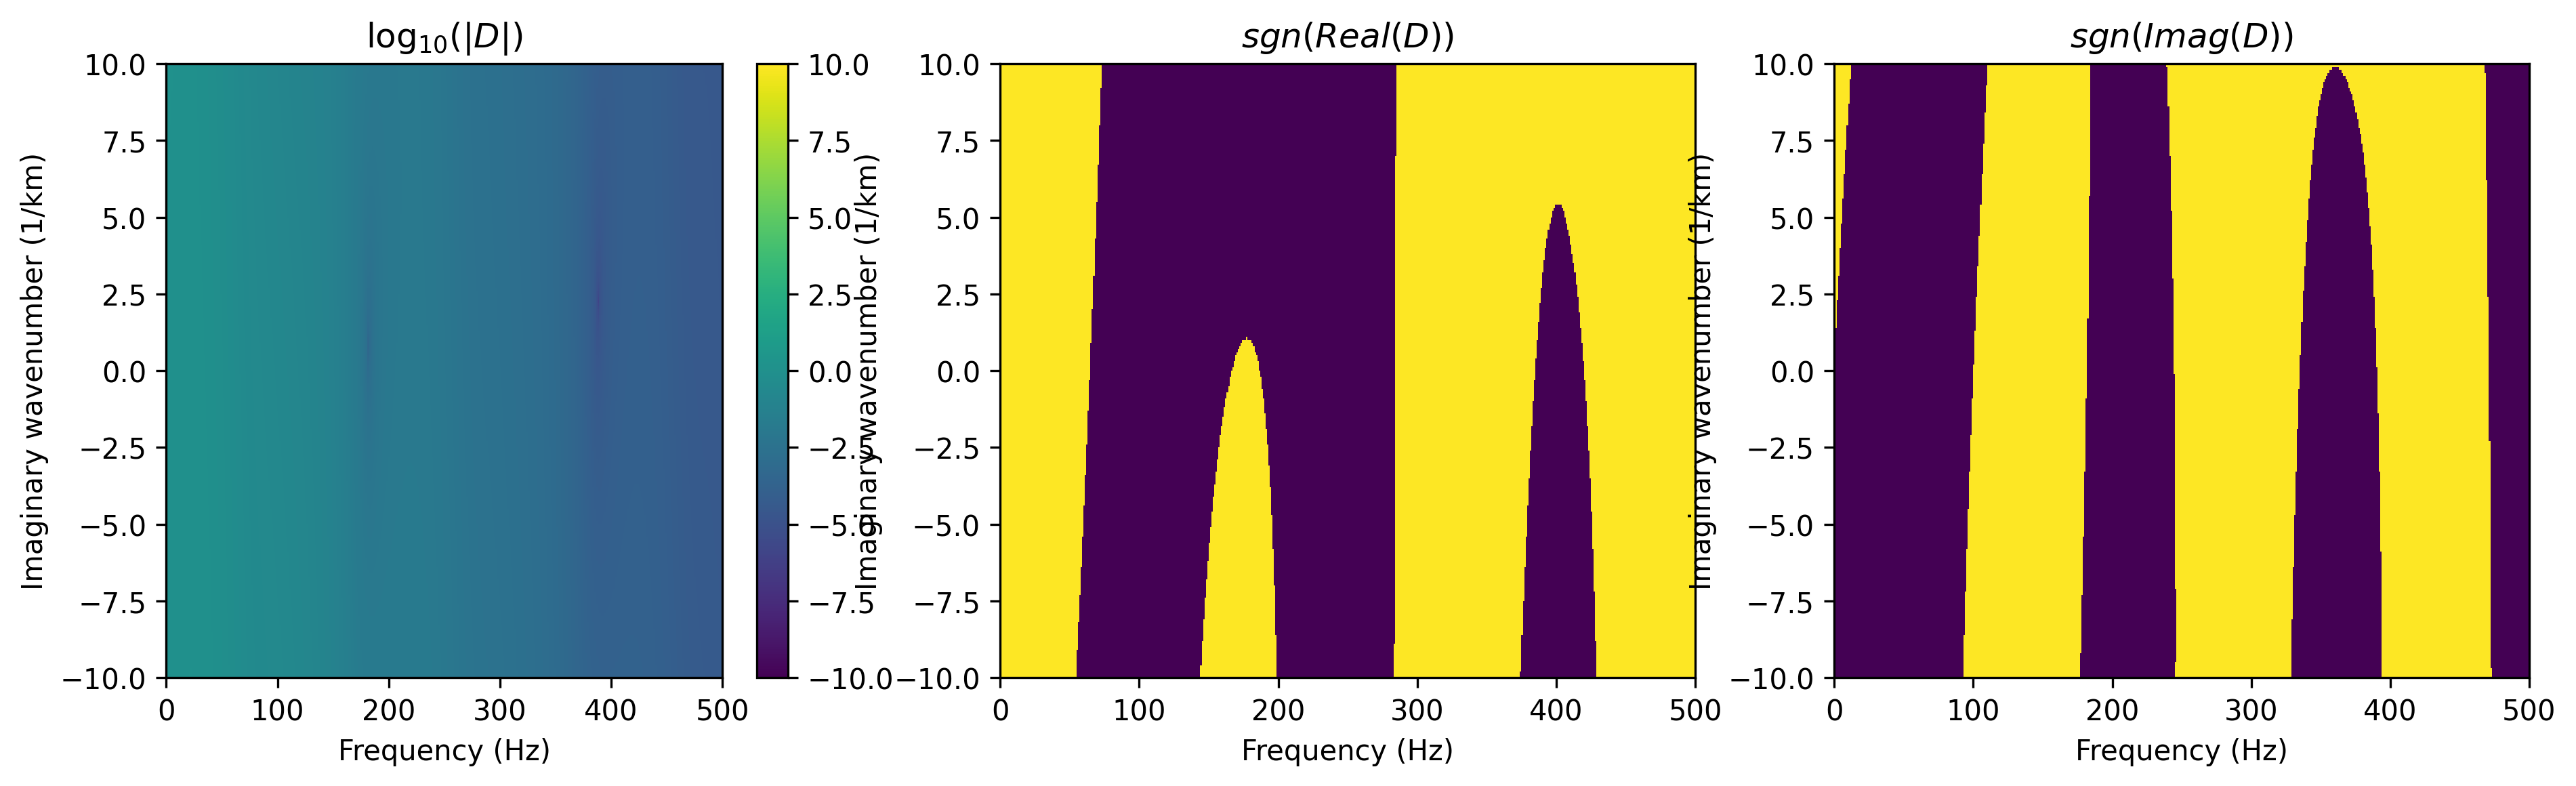

In [13]:
embedded_waves_map = embedded_waves_map1

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=10
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

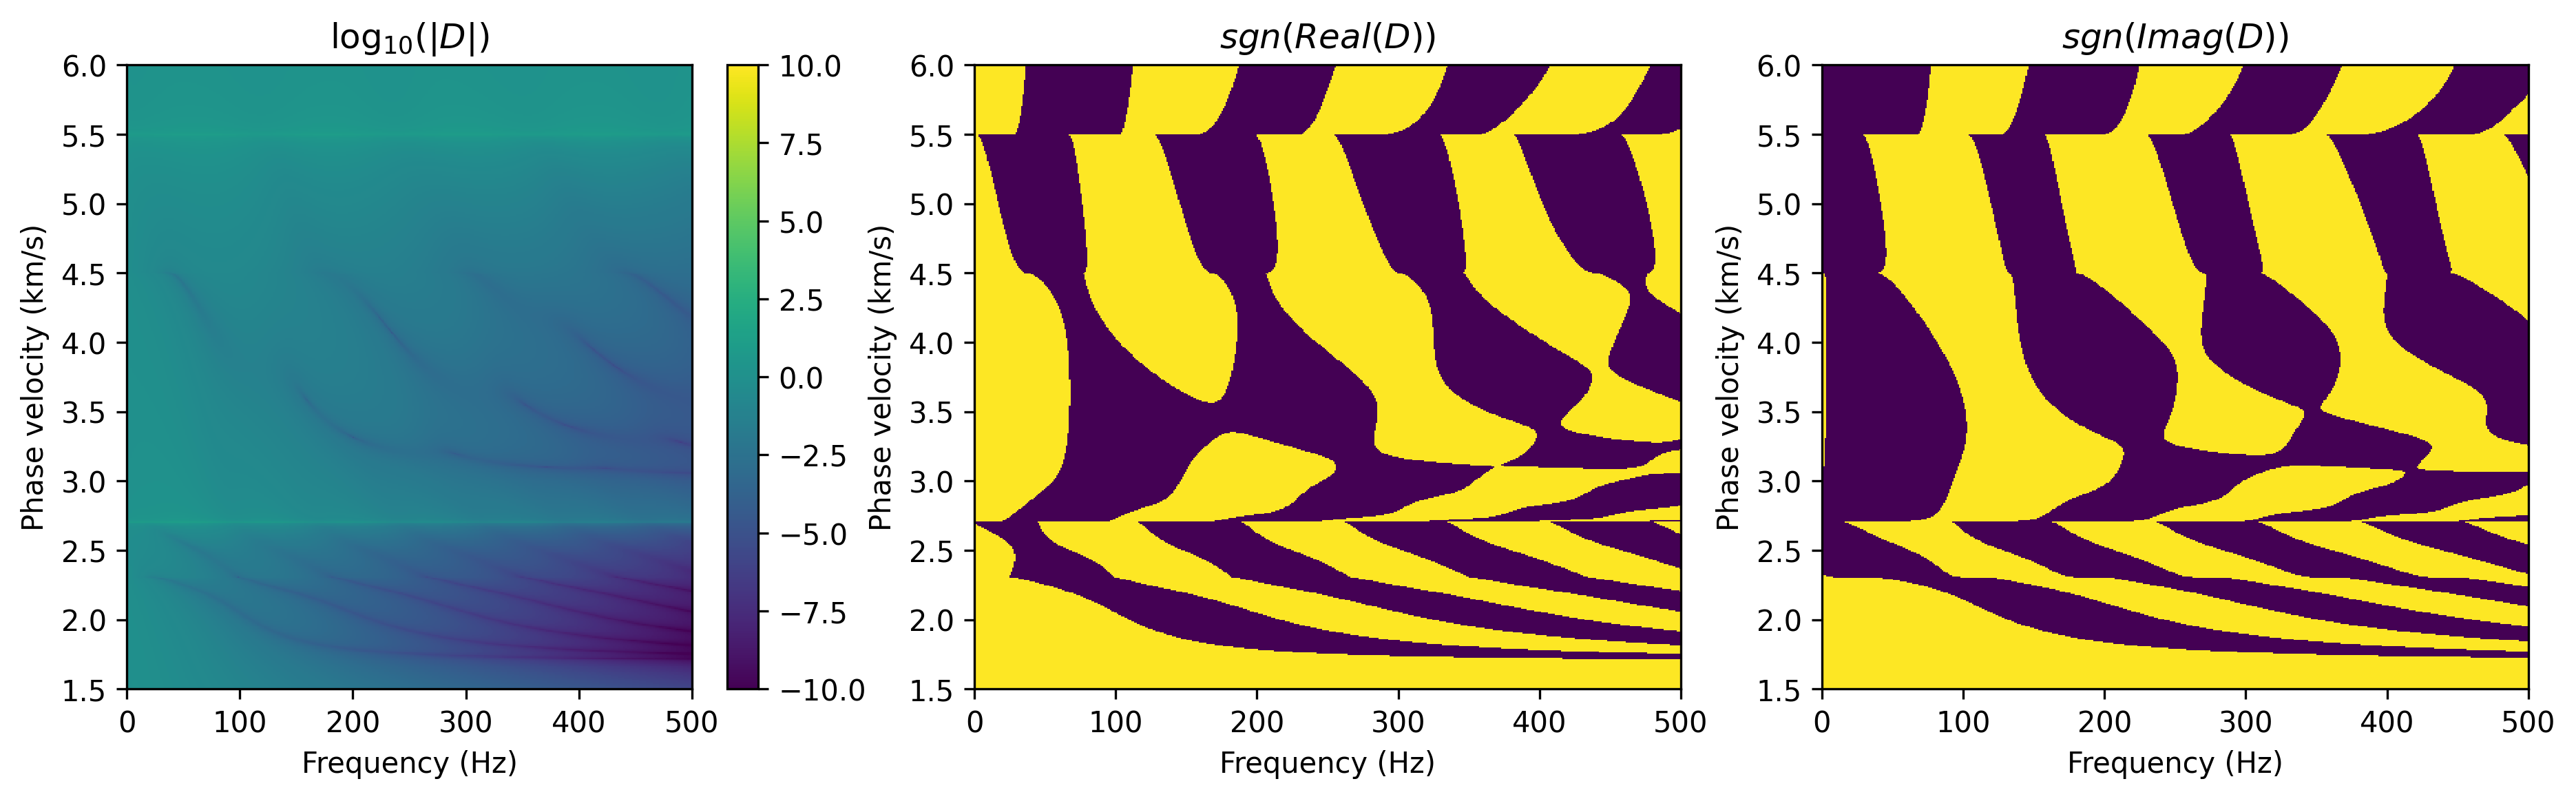

In [15]:
embedded_waves_map = embedded_waves_map2

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=10
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.savefig("test1.png")

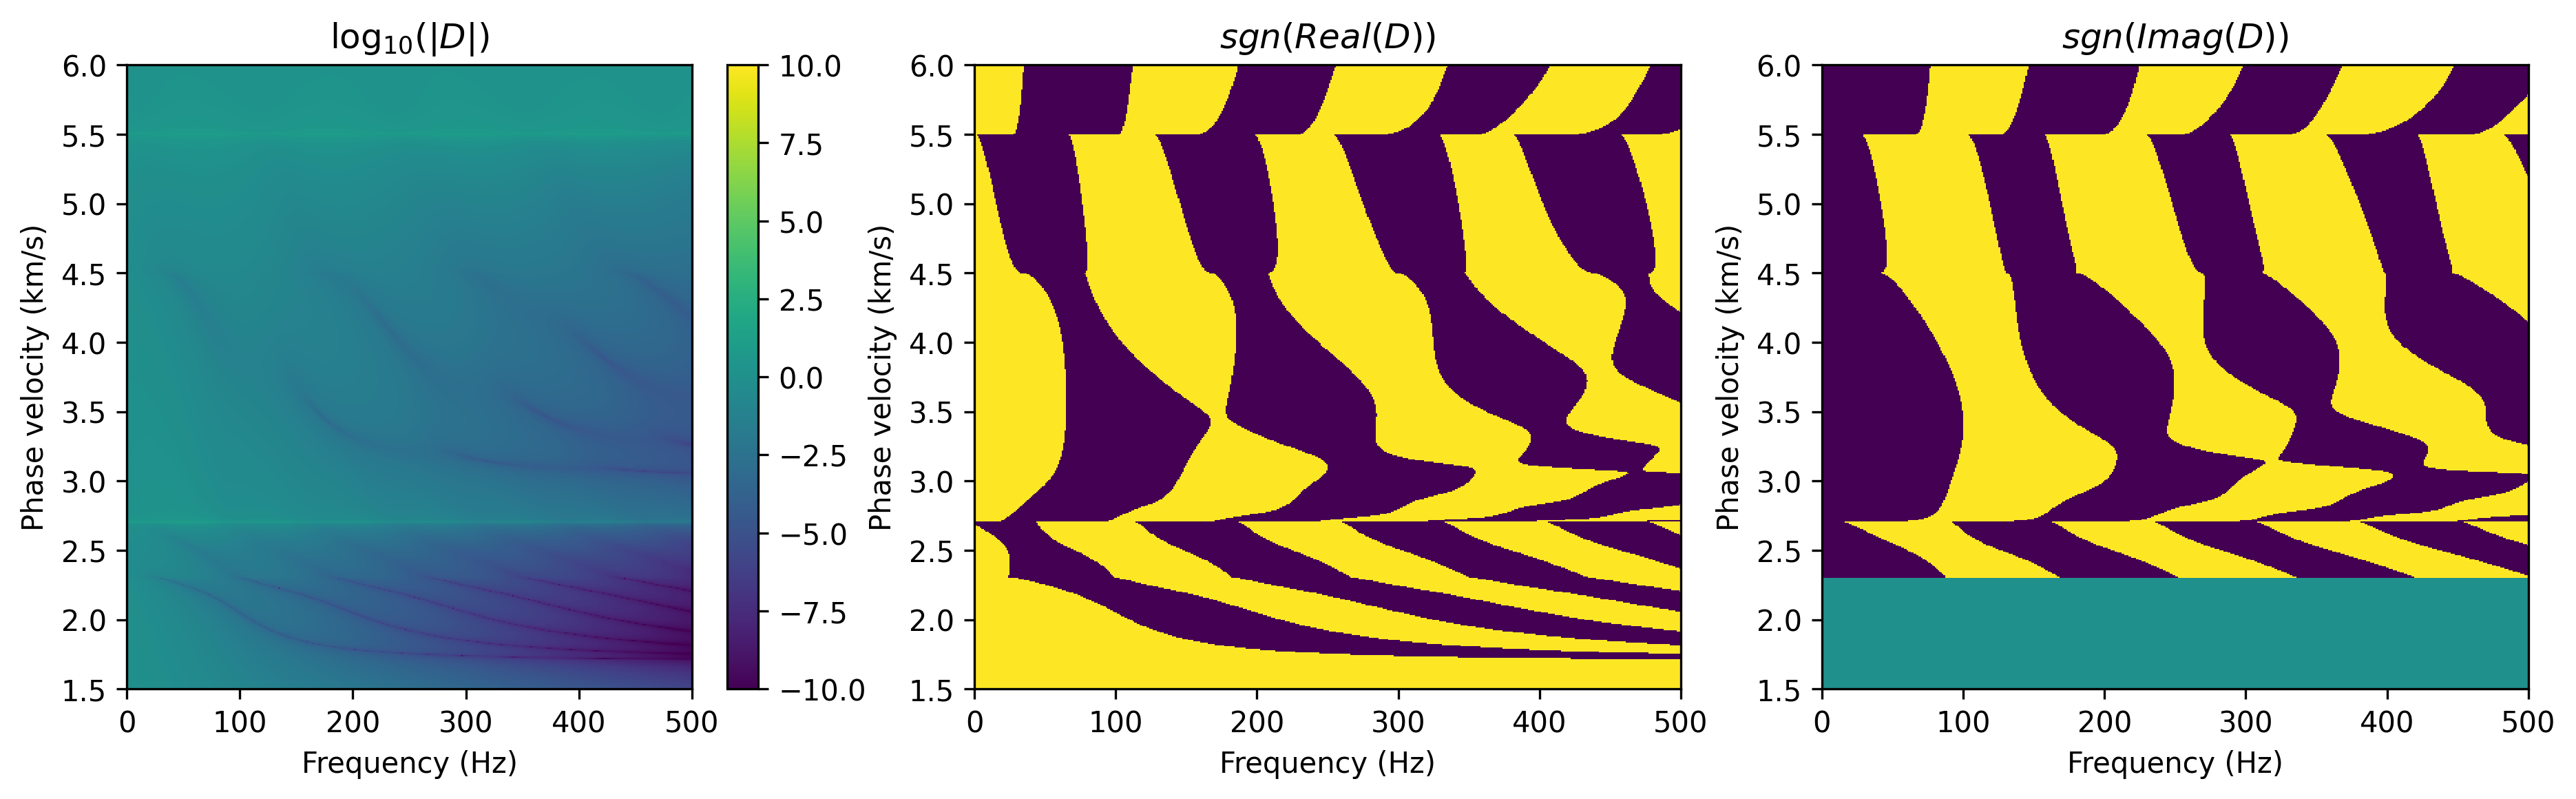

In [11]:
embedded_waves_map = embedded_waves_map3

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=10
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.savefig("test2.png")